In [150]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
pd.options.mode.chained_assignment = None

In [2]:
data2019 = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key=a4bcb4614372e8f229066cbce694ccdb6b558ef4').json()

In [3]:
data2020 = requests.get('https://api.census.gov/data/2019/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key=a4bcb4614372e8f229066cbce694ccdb6b558ef4').json()

In [5]:
companysummarystate2019 = pd.DataFrame (data2019[1:], columns= data2019[0])

In [6]:
companysummarystate2020 = pd.DataFrame(data2020[1:], columns = data2020[0])

In [7]:
companysummarystate2019.drop(columns = ['GEO_ID','NAICS2017_LABEL','NAICS2017','state'], inplace=True)

In [8]:
companysummarystate2020.drop(columns = ['GEO_ID','NAICS2017_LABEL','NAICS2017','state'], inplace=True)

In [9]:
companysummarystate2019.head()

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP
0,Mississippi,002,029,00,003,0
1,Mississippi,003,029,00,003,466
2,Mississippi,004,029,00,003,572
3,Mississippi,001,001,30,003,926
4,Mississippi,096,096,96,096,37489


In [10]:
companysummarystate2020.head()

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP
0,Mississippi,001,028,00,001,93
1,Mississippi,003,028,00,001,0
2,Mississippi,002,029,50,001,0
3,Mississippi,003,029,50,001,51
4,Mississippi,001,001,60,001,2489


In [11]:
companysummarystate2019.FIRMPDEMP.isna().value_counts()

False    9668
Name: FIRMPDEMP, dtype: int64

In [12]:
companysummarystate2020.FIRMPDEMP.isna().value_counts()

False    9641
Name: FIRMPDEMP, dtype: int64

In [13]:
statemerge = companysummarystate2019.merge(companysummarystate2020, on=['NAME', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP'], how='inner', suffixes = ('_2019', '_2020') )

The totals for each column are 001, except Race_Group which is 00.

Make sure that you filter for totals on all the other columns except for the ones you are looking at. (Ex: If you are looking for all male owned businesses, you filter for 003 on the sex column, 001 on eth group, vet group, and 00 on race group)

In [108]:
statemerge['CHANGE'] = statemerge['FIRMPDEMP_2020'] - statemerge['FIRMPDEMP_2019']

In [182]:
statemerge.loc[statemerge["SEX"] == "001", "SEX"] = 'Total'
statemerge.loc[statemerge["SEX"] == "002", "SEX"] = 'Female'
statemerge.loc[statemerge["SEX"] == "003", "SEX"] = 'Male'
statemerge.loc[statemerge["SEX"] == "004", "SEX"] = 'Non-Binary'

In [183]:
statemerge

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP_2019,FIRMPDEMP_2020,CHANGE
0,Mississippi,Male,029,00,003,466,334,-132
1,Mississippi,Non-Binary,029,00,003,572,0,-572
2,Mississippi,Total,001,30,003,926,801,-125
3,Mississippi,096,096,96,096,37489,37057,-432
4,Mississippi,Female,001,00,001,6659,7751,1092
...,...,...,...,...,...,...,...,...
9133,Texas,Non-Binary,001,30,004,52629,48048,-4581
9134,Texas,Total,020,30,004,49702,49558,-144
9135,Texas,Total,028,30,004,5861,5444,-417
9136,Texas,Total,029,30,004,253350,258006,4656


In [184]:
statemerge['FIRMPDEMP_2020'] = pd.to_numeric(statemerge['FIRMPDEMP_2020'])

In [185]:
statemerge['FIRMPDEMP_2019'] = pd.to_numeric(statemerge['FIRMPDEMP_2019'])

In [199]:
bfilter = statemerge[(statemerge['RACE_GROUP'] == '90') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [200]:
black = maleminorityfilter.groupby("SEX").sum("FIRMPDEMP_2019")

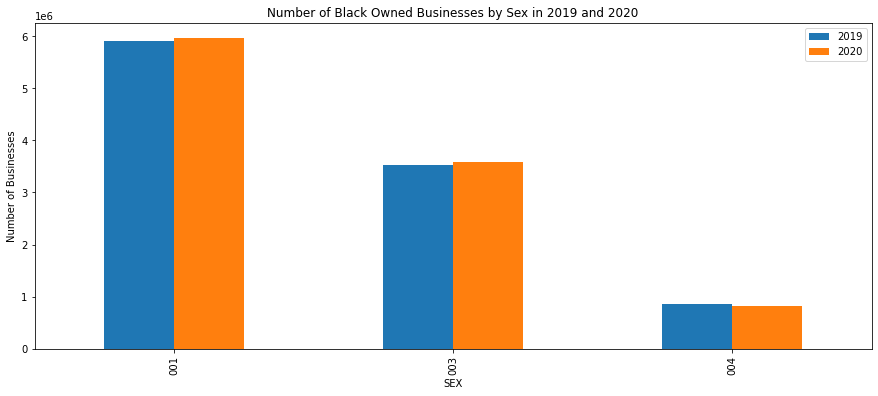

In [201]:
ax = black.plot(title = 'Number of Black Owned Businesses by Sex in 2019 and 2020', ylabel = 'Number of Businesses', y= ['FIRMPDEMP_2019', 'FIRMPDEMP_2020'], kind ='bar', use_index =True, figsize=(15, 6))
ax.legend(["2019", "2020"])

In [194]:
bfilter = statemerge[(statemerge['SEX'] == 'Total') & (statemerge['RACE_GROUP'] == '90') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [195]:
bbusinesslost = bfilter.groupby('NAME').sum('CHANGE').nsmallest(7, 'CHANGE')

Text(0.5, 1.0, 'States That Lost the Most Black Owned Businesses Between 2019 & 2020')

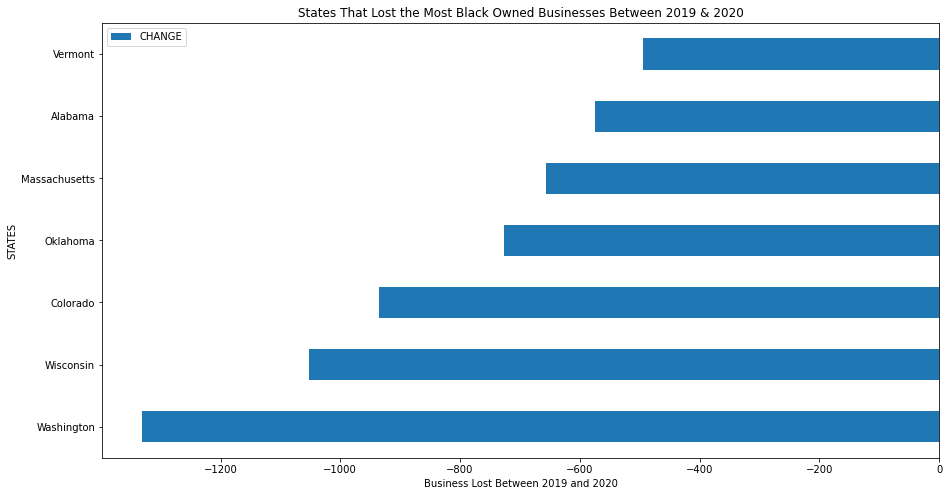

In [196]:
fig, ax = plt.subplots()
bbusinesslost.plot(kind='barh', ax=ax, y= 'CHANGE', figsize = (15,8))
ax.set_ylabel('STATES')
ax.set_xlabel('Business Lost Between 2019 and 2020')
ax.set_title('States That Lost the Most Black Owned Businesses Between 2019 & 2020')
#ax = df.plot(kind='bar') # "same" as above

In [191]:
bbusinessgained = bfilter.groupby('NAME').sum('CHANGE').nlargest(7, 'CHANGE')

IndexError: index 0 is out of bounds for axis 0 with size 0

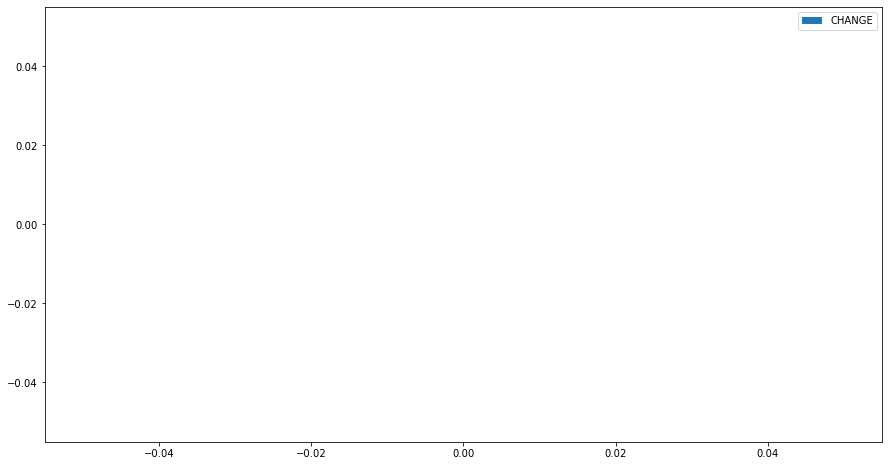

In [192]:
fig, ax = plt.subplots()
bbusinessgained.plot(kind='barh', ax=ax, y= 'CHANGE', figsize = (15,8))
ax.set_ylabel('STATES')
ax.set_xlabel('Business Gained Between 2019 and 2020')
ax.set_title('States That Gained the Most Black Owned Businesses Between 2019 & 2020')
#ax = df.plot(kind='bar') # "same" as above

In [193]:
sexfilter = statemerge[(statemerge['SEX'] != '004') & (statemerge['SEX'] != '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001') & (statemerge['ETH_GROUP']== '001')]

In [158]:
sexfilter

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP_2019,FIRMPDEMP_2020,CHANGE
4,Mississippi,002,001,00,001,6659,7751,1092
5,Mississippi,003,001,00,001,25943,24533,-1410
290,Missouri,002,001,00,001,20311,23913,3602
306,Missouri,003,001,00,001,59319,58367,-952
390,Montana,002,001,00,001,5584,6079,495
...,...,...,...,...,...,...,...,...
8230,Iowa,003,001,00,001,34277,33644,-633
8379,Maryland,002,001,00,001,22668,23583,915
8529,Maryland,003,001,00,001,63860,62230,-1630
8842,Texas,002,001,00,001,84697,94432,9735


In [161]:
mf = sexfilter.groupby('SEX').sum('FIRMPDEMP_2019')

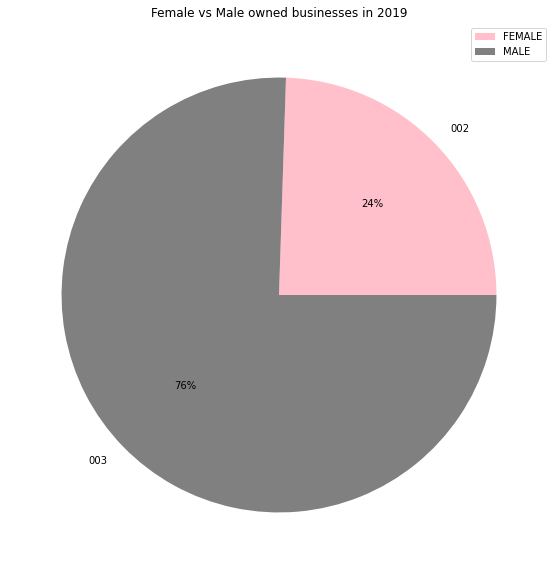

In [173]:
mf.plot.pie(title = 'Female vs Male owned businesses in 2019',y='FIRMPDEMP_2019', autopct='%1.0f%%', colors = ['pink', 'grey'], ylabel = '',figsize=(10,10)).legend(['FEMALE', 'MALE'])

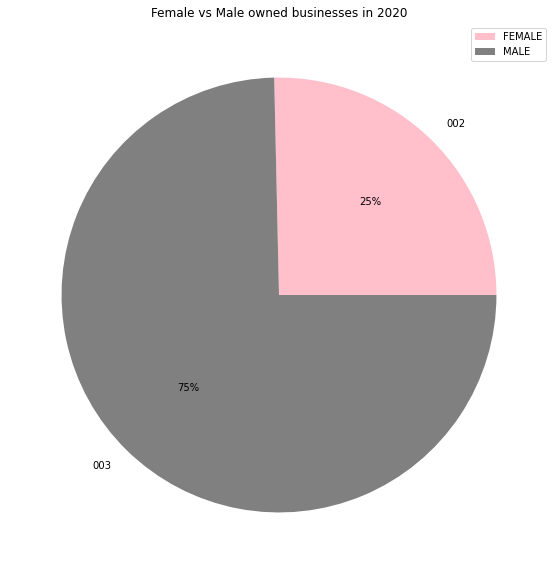

In [175]:
mf.plot.pie(title = 'Female vs Male owned businesses in 2020',y='FIRMPDEMP_2020', autopct='%1.0f%%', colors = ['pink', 'grey'], ylabel = '',figsize=(10,10)).legend(['FEMALE', 'MALE'])